In [1]:
import numpy as np
import matplotlib.pyplot as plt
from dataclasses import dataclass

In [522]:
class Gaussian:      
    def __init__(self, means: np.ndarray, cov: np.ndarray):
        assert cov.ndim == 2
        assert means.ndim == 1
        assert means.shape[0] == cov.shape[0] == cov.shape[1]
        
        self.means = means
        self.cov = cov
        self.eps = 0.00001
        
    def _stabilize(self, x: np.ndarray) -> np.ndarray:
        return x + np.eye(x.shape[0])*self.eps
        
    @property
    def s_cov(self) -> np.ndarray:
        return self._stabilize(self.cov)
        
    def sample(self) -> np.ndarray:
        return np.linalg.cholesky(self.s_cov) @ np.random.randn(self.means.shape[0]) + self.means
    
    def p(self, x: np.ndarray) -> float:
        assert n.ndim == 1 and n.shape[0] == self.means.shape[0]
        
        d = x - self.means
        return 1/((2*np.pi)**(x.shape[0]/2) * np.sqrt(np.linalg.det(self.cov))) * np.exp(-0.5 * d.T @ np.linalg.inv(self.s_cov) @ d)
    
    def condition(self, x: np.ndarray) -> Gaussian:
        n = x.shape[0]
        mu_x = self.means[:n]
        mu_y = self.means[n:]
        sigma_xx = self.cov[:n, :n]
        sigma_yy = self.cov[n:, n:]
        sigma_xy = self.cov[:n, n:]
        sigma_yx = self.cov[n:, :n]
        
        sigma_xx_i = np.linalg.inv(self._stabilize(sigma_xx))
        
        return Gaussian(mu_y + sigma_yx @ sigma_xx_i @ (x - mu_x), sigma_yy - sigma_yx @ sigma_xx_i @ sigma_xy)        

In [523]:
def rbf_kernel(x: np.ndarray, sigma: float, l: float) -> np.ndarray:
    return sigma * np.exp(-np.square(x[np.newaxis, :] - x[:, np.newaxis])/(2*l*l))

In [524]:
max_val = 10
x = np.linspace(0,max_val,100)

In [525]:
rbf_sigma = 1
rbf_l = 1

rbf_p = lambda x: rbf_kernel(x, rbf_sigma, rbf_l)

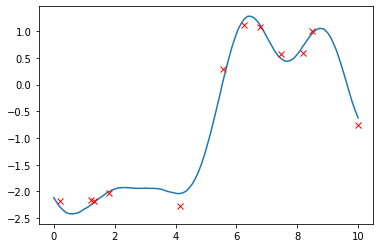

In [526]:
prior = Gaussian(np.zeros(x.shape), rbf_p(x))

y = prior.sample()

keep = np.random.random(x.shape) > 0.9
x_ds, y_ds = x[keep], y[keep]
y_ds += np.random.randn(y_ds.shape[0])*0.2
plt.plot(x, y, "-", x_ds, y_ds, "xr")

In [527]:
def gp_fit(x_data: np.ndarray, y_data: np.ndarray, x_query: np.ndarray, kernel) -> Gaussian:
    all_x = np.concatenate((x_data, x_query), 0)
    g = Gaussian(np.zeros(all_x.shape[0]), kernel(all_x))
    return g.condition(y_data)

In [528]:
y_gp = gp_fit(x_ds, y_ds, x,  lambda x: rbf_kernel(x, rbf_sigma, 3))

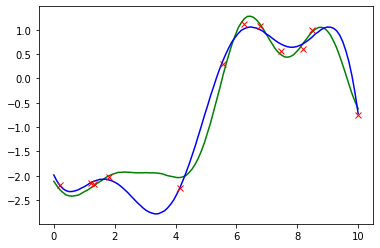

In [529]:
plt.plot(x, y, "-g", x, y_gp.sample(), "-b", x_ds, y_ds, "xr")

(3, 1) (1, 100)


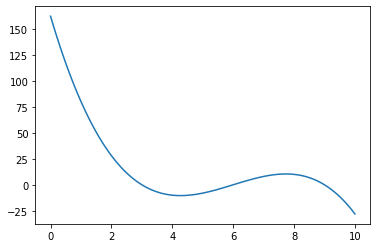

In [530]:
zeros = np.random.randint(max_val, size=[3])

def poly(x: np.ndarray) -> np.ndarray:
    return (zeros[np.newaxis, :] - x[:, np.newaxis]).prod(-1)  

y = fn(x)
plt.plot(x, y)

In [531]:
y_gp = gp_fit(x_ds, y_ds, x,  lambda x: rbf_kernel(x, rbf_sigma, 2))

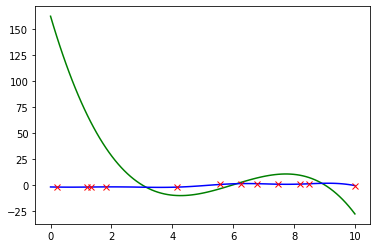

In [532]:
plt.plot(x, y, "-g", x, y_gp.sample(), "-b", x_ds, y_ds, "xr")

In [533]:
x = np.linspace(0,1,100)

In [534]:
def poly_kernel(x: np.ndarray, deg: int, c: float = 1) -> np.ndarray:
    return np.power(x[:, np.newaxis] @ x[np.newaxis, :], deg)

pgp_test = Gaussian(np.zeros(x.shape[0]), poly_kernel(x, 10, 1))

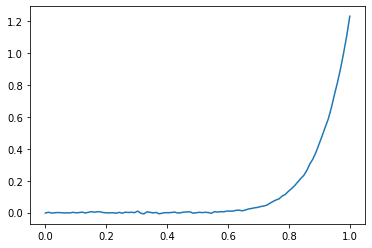

In [535]:
plt.plot(x, pgp_test.sample())

In [536]:
y_gp = gp_fit(x_ds, y_ds, x,  lambda x: poly_kernel(x, 4, 1))

In [537]:
plt.plot(x, y, "-g", x, y_gp.sample(), "-b", x_ds, y_ds, "xr")

LinAlgError: Matrix is not positive definite